# Importing the Library

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy.stats import boxcox, zscore, yeojohnson
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [114]:
#Calling the train data
train = pd.read_csv(r"C:\Users\jjjib\Desktop\Analytics Vidhya\train_wn75k28.csv")

In [115]:
#Calling the test data
test = pd.read_csv(r"C:\Users\jjjib\Desktop\Analytics Vidhya\test_Wf7sxXF.csv")

# Data Understanding

In [116]:
train.head() #Looking into the top 5 rows of the dataset

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [117]:
train.shape #Looking into the shape of the dataset

(39161, 19)

In [118]:
test.shape #Looking into the shape of the dataset

(13184, 18)

In [119]:
train.info() #Getting the information on the train datset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [120]:
test.info() #Getting the information on the test datset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

In [121]:
train.isnull().sum() #Checking for null values in train data

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [122]:
test.isnull().sum() #Checking for null values in test data

id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dtype: int64

# Exploratory Data Analysis

We firstly treat the null data present in the dataset. Both for train and test data.
We see that there are 2 columns with the presence of null values for both train and test data.

In [123]:
#Fill null values in product purchased with 0
train['products_purchased'].fillna('0',inplace=True)

In [124]:
#Converting the column into numeric type
train['products_purchased'] = train['products_purchased'].apply(pd.to_numeric)

We will fill the null data in sign up date column with created at column. This we do to unlock the further process of creating a column 'days' that calculates the number of days between the two dates

In [125]:
#Filling null values in one column with the data from another
train['signup_date'].fillna(train['created_at'], inplace=True)

In [126]:
#Converting the columns into datetime format for further analysis
train['signup_date'] = pd.to_datetime(train['signup_date'], format='%Y-%M-%d')
train['created_at'] = pd.to_datetime(train['created_at'], format='%Y-%M-%d')

In [127]:
#Creating a column for number of days 
train['Days'] = (train['created_at']-train['signup_date']).dt.days

Now since we took out the days of signed up. Let us drop both the datetime type columns

In [128]:
train.drop(columns=['signup_date','created_at'],inplace=True)

Similarly we do for the test data

In [129]:
test['products_purchased'].fillna('0',inplace=True)

In [130]:
test['products_purchased'] = test['products_purchased'].apply(pd.to_numeric)

In [131]:
test['signup_date'].fillna(test['created_at'], inplace=True)

In [132]:
test['signup_date'] = pd.to_datetime(test['signup_date'], format='%Y-%M-%d')
test['created_at'] = pd.to_datetime(test['created_at'], format='%Y-%M-%d')

In [133]:
test['Days'] = (test['created_at']-test['signup_date']).dt.days

In [134]:
test.drop(columns=['signup_date','created_at'],inplace=True)

Checking for null values again

In [135]:
train.isnull().sum() #Checking for null values

id                      0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
Days                    0
dtype: int64

In [136]:
test.isnull().sum() #Checking for null values

id                      0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
Days                    0
dtype: int64

Visual representation for the null values present in the dataset

<AxesSubplot:>

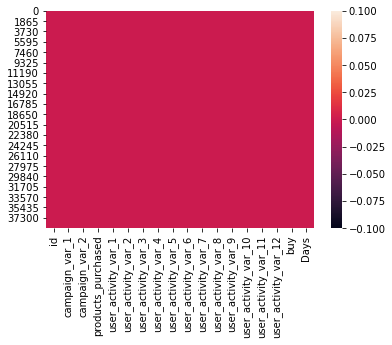

In [137]:
#Null value visualization for train data
sns.heatmap(train.isnull())

<AxesSubplot:>

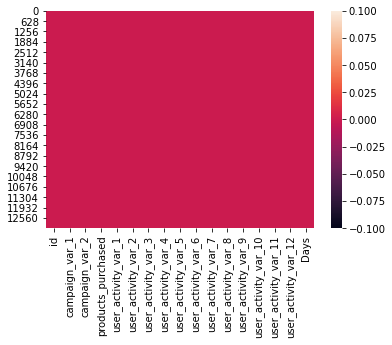

In [138]:
#Null value visualization for test data
sns.heatmap(test.isnull())

In [139]:
#Statistical representation of the data
train.describe() 

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,Days
count,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,1.003881,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020,165.500421
std,11304.951283,3.472944,2.614296,1.199223,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042,343.061076
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-394.000000
25%,9791.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,362.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2211.000000


We see that the column 'id' is unique to every row for both train and test data and hence we shall drop this column for better model

In [140]:
#Drop the column 'id'
train2 = train.drop(columns='id')
test2 = test.drop(columns='id')

# Correlation

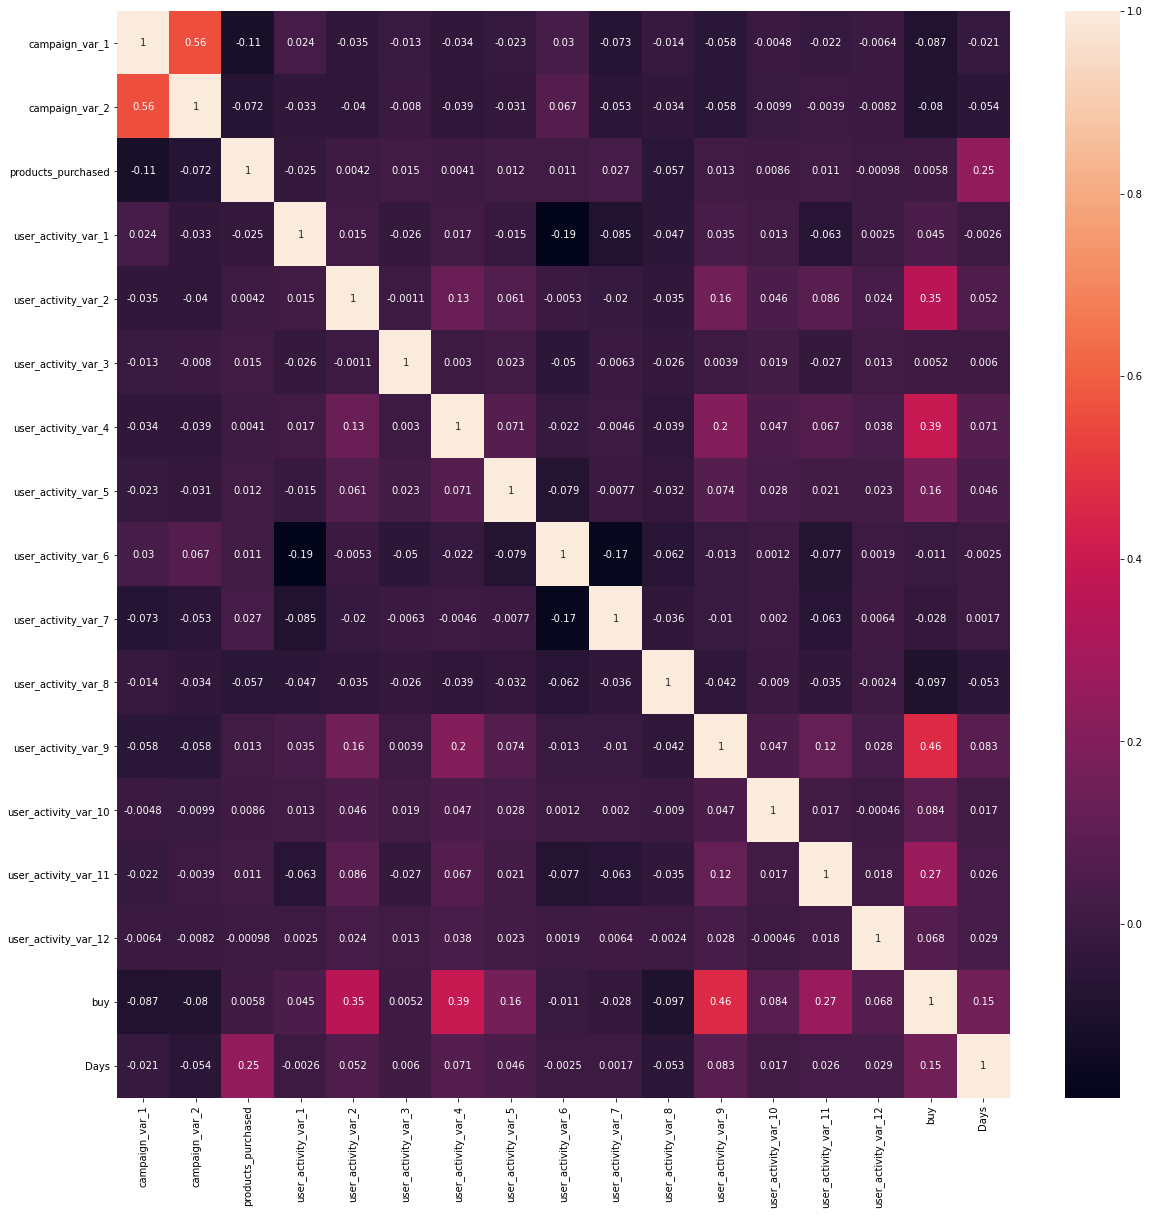

In [141]:
#COrrelation matrix visualization
plt.figure(figsize=(20,20))
sns.heatmap(train2.corr(),annot=True)
plt.show()

In [142]:
#Correlation matrix wrt target column
train2.corr()['buy']

campaign_var_1         -0.087202
campaign_var_2         -0.080064
products_purchased      0.005830
user_activity_var_1     0.044811
user_activity_var_2     0.354627
user_activity_var_3     0.005174
user_activity_var_4     0.394706
user_activity_var_5     0.164972
user_activity_var_6    -0.010951
user_activity_var_7    -0.028428
user_activity_var_8    -0.097355
user_activity_var_9     0.463947
user_activity_var_10    0.084423
user_activity_var_11    0.267995
user_activity_var_12    0.067967
buy                     1.000000
Days                    0.151691
Name: buy, dtype: float64

# Splitting the dataset

In [143]:
#Splitting the train dataset into taget and feature variables
x = train2.drop(columns='buy') #Feature variable
y = train2['buy']              #Target variable

#Assigning variable for prediction data
x2 = test2 

# Scaling

In [144]:
#Scaling using Standard Scaler
sc = StandardScaler()
cols = x.columns
x = pd.DataFrame(sc.fit_transform(x), columns=cols)

# Best Random State

In [145]:
maxRS = 0
maxAcc = 0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr = LogisticRegression(max_iter=100)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = f1_score(y_test, pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print("Max accuracy: \t", maxAcc)
print("Random State: \t", maxRS)

Max accuracy: 	 0.7091757387247279
Random State: 	 42


Now since we got the best random state for data modelling, we create the test train models

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=maxRS)

# Upsample

In [147]:
U = pd.concat([x_train,y_train], axis=1) #Joining the train dataset

In [149]:
no = U[U['buy']==0]
yes = U[U['buy']==1]

In [150]:
upsample = resample(yes,
                    replace=True, #Sample with replacement
                    n_samples=len(no), #matching with the majority class
                    random_state=48) #Reproductible results


In [151]:
new_U = pd.concat([no,upsample])
new_U['buy'].value_counts()

0    29733
1    29733
Name: buy, dtype: int64

In [152]:
x_train = new_U.drop(columns='buy')
y_train = new_U['buy']

# Model Predictions

Logistic Regression

In [153]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy: \t", f1_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 40.70904645476773
[[6530  900]
 [  70  333]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      7430
           1       0.27      0.83      0.41       403

    accuracy                           0.88      7833
   macro avg       0.63      0.85      0.67      7833
weighted avg       0.95      0.88      0.90      7833



K-Nearest Neighbors

In [154]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print("Accuracy: \t", f1_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 51.26353790613718
[[7009  421]
 [ 119  284]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      7430
           1       0.40      0.70      0.51       403

    accuracy                           0.93      7833
   macro avg       0.69      0.82      0.74      7833
weighted avg       0.95      0.93      0.94      7833



Support Vector Classifier

In [155]:
svc = SVC()
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
print("Accuracy: \t", f1_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 45.93639575971731
[[6743  687]
 [  78  325]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      7430
           1       0.32      0.81      0.46       403

    accuracy                           0.90      7833
   macro avg       0.65      0.86      0.70      7833
weighted avg       0.95      0.90      0.92      7833



Random Forest Classifier

In [156]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy: \t", f1_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 67.12328767123287
[[7348   82]
 [ 158  245]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7430
           1       0.75      0.61      0.67       403

    accuracy                           0.97      7833
   macro avg       0.86      0.80      0.83      7833
weighted avg       0.97      0.97      0.97      7833



Decision Tree Classifier

In [157]:
dtt = DecisionTreeClassifier()
dtt.fit(x_train,y_train)
pred = dtt.predict(x_test)
print("Accuracy: \t", f1_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 58.28295042321645
[[7247  183]
 [ 162  241]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7430
           1       0.57      0.60      0.58       403

    accuracy                           0.96      7833
   macro avg       0.77      0.79      0.78      7833
weighted avg       0.96      0.96      0.96      7833



XGB Classifier

In [158]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
pred = xgb.predict(x_test)
print("Accuracy: \t", f1_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[18:15:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 	 53.33333333333334
[[6964  466]
 [  87  316]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      7430
           1       0.40      0.78      0.53       403

    accuracy                           0.93      7833
   macro avg       0.70      0.86      0.75      7833
weighted avg       0.96      0.93      0.94      7833



We see that 'Random Forest Classifier' model performs the best with 67.12%

# Cross Validation

In [159]:
scr1 = cross_val_score(lr, x, y, cv=5)
print("Cross validation score of Logistic Regression is: \t", scr1.mean())

Cross validation score of Logistic Regression is: 	 0.9731621129119397


In [160]:
scr2 = cross_val_score(knn, x, y, cv=5)
print("Cross validation score of KNN is: \t", scr2.mean())

Cross validation score of KNN is: 	 0.9729578326002702


In [161]:
scr3 = cross_val_score(svc, x, y, cv=5)
print("Cross validation score of SVC is: \t", scr3.mean())

Cross validation score of SVC is: 	 0.9748985363122185


In [162]:
scr4 = cross_val_score(dtt, x, y, cv=5)
print("Cross validation score of Decision Tree is: \t", scr4.mean())

Cross validation score of Decision Tree is: 	 0.9534232119759427


In [163]:
scr5 = cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Random Forest is: \t", scr5.mean())

Cross validation score of Random Forest is: 	 0.9729067894180705


In [164]:
scr6 = cross_val_score(xgb, x, y, cv=5)
print("Cross validation score of XGBoost is: \t", scr6.mean())

[18:19:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:19:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:19:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

We can see that 'Random Forest' performs comparitively good with very little difference.

# Hyper Parameter Tuning

In [165]:
#Getting the parameters for the model
GridSearchCV.get_params(rf)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [169]:
#Initiating the required parameters
parameters = {'bootstrap': [True,False],
              'max_depth': [10, 20, 30, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 200, 400]}

In [170]:
#Applying the selected parameters
gcv = GridSearchCV(rf, parameters, cv=5, scoring='f1')

In [171]:
#Training the tuned model
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [10, None],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [200, 100]},
             scoring='f1')

In [172]:
#Best parameters for the model
gcv.best_params_

{'bootstrap': True,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [174]:
#Initiating the new model with tuned parameters
rf2 = RandomForestClassifier(**gcv.best_params_)

In [175]:
rf2.fit(x_train,y_train)

RandomForestClassifier()

In [176]:
#Calculating the score
pred = rf2.predict(x_test)
f1_score(y_test,pred)

0.6729986431478969

We see that the f1 score increased slightly to 67.29%

# ROC Curve

Plotting the ROC curve to understand the result better

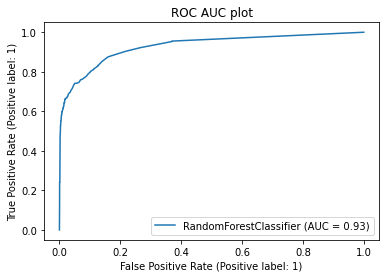

In [177]:
plot_roc_curve(rf2,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

AUC score of 93% is very good.

# Saving the best model

In [178]:
#Saving the best model using pickle
joblib.dump(rf2,"rebuy.pkl")

['rebuy.pkl']

# Predictions

Making predictions for the test data using the best model

In [179]:
#Making predictions
final_predictions = rf2.predict(x2)

In [180]:
#Creating a dataframe of the predicted data
sheet1 = test['id']
sheet2 = pd.Series(final_predictions)

In [181]:
final = pd.DataFrame({'id':sheet1,
                     'buy':sheet2})

In [182]:
final.head()

,id,buy
0,39162,0
1,39163,0
2,39164,0
3,39165,0
4,39166,0


In [183]:
#Creating a csv file for the data
final.to_csv('result_smartlead.csv')